In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from chainer.iterators import MultiprocessIterator, SerialIterator
import cProfile
import pstats
import numpy as np

In [2]:
def convert_to_keras_batch(iter):
    while True:
        batch = iter.__next__() # type: List[Tuple[np.ndarray, np.ndarray]]
        xs = [x for (x, _) in batch] # type: List[np.ndarray]
        ys = [y for (_, y) in batch] # type: List[np.ndarray]
        _xs = np.array(xs) # (n, 480, 360, 3)
        _ys = np.array(ys) # (n, 480, 360, n_classes)
        yield (_xs, _ys)

In [3]:
from mscoco import get_iter as get_coco
train, valid = get_coco((512, 512))

loading annotations into memory...
Done (t=27.43s)
creating index...
index created!
loading annotations into memory...
Done (t=16.36s)
creating index...
index created!


In [4]:
train_iter = convert_to_keras_batch(
        SerialIterator(
        #MultiprocessIterator(
            train,
            batch_size=1,
            #n_processes=12,
            #n_prefetch=80,
            #shared_mem=1000*1000*5
        )
)

In [5]:
'''
cProfile.run("train_iter.__next__()", filename="main.prof")
pstats.Stats("main.prof").strip_dirs().sort_stats("cumulative").print_stats()
'''

'\ncProfile.run("train_iter.__next__()", filename="main.prof")\npstats.Stats("main.prof").strip_dirs().sort_stats("cumulative").print_stats()\n'

In [6]:
a, b= train_iter.__next__()

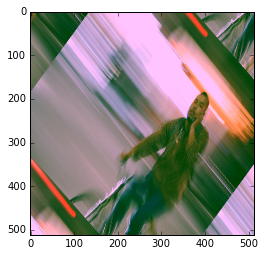

In [7]:
plt.imshow(a[0])

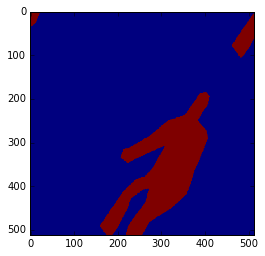

In [8]:
plt.imshow(b[0])

In [9]:
(a.shape, b.shape)

((1, 512, 512, 3), (1, 512, 512))